In [70]:
from requests import get
from bs4 import BeautifulSoup
import os
import re
from env import github_token, github_username
import scraper
import acquire_r
import pandas as pd
import json
import seaborn as sns

In [2]:
# headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

# if headers["Authorization"] == "token " or headers["User-Agent"] == "":
#     raise Exception(
#         "You need to follow the instructions marked TODO in this script before trying to use it"
#     )

In [4]:
# List of urls to scrape
# g_url = ['https://github.com/search?o=desc&p=1&q=stars%3A%3E1&s=forks&type=Repositories', ' https://github.com/search?o=desc&p=2&q=stars%3A%3E1&s=forks&type=Repositories'\
#          'https://github.com/search?o=desc&p=3&q=stars%3A%3E1&s=forks&type=Repositories', 'https://github.com/search?o=desc&p=4&q=stars%3A%3E1&s=forks&type=Repositories',\
#          'https://github.com/search?o=desc&p=5&q=stars%3A%3E1&s=forks&type=Repositories','https://github.com/search?o=desc&p=6&q=stars%3A%3E1&s=forks&type=Repositories',\
#         'https://github.com/search?o=desc&p=7&q=stars%3A%3E1&s=forks&type=Repositories','https://github.com/search?o=desc&p=8&q=stars%3A%3E1&s=forks&type=Repositories',\
#         'https://github.com/search?o=desc&p=9&q=stars%3A%3E1&s=forks&type=Repositories','https://github.com/search?o=desc&p=10&q=stars%3A%3E1&s=forks&type=Repositories']

In [90]:
# def get_repos(urls):
#     repo = []
#     for url in urls:    
#         response = get(url, headers=headers)
#         soup = BeautifulSoup(response.text)
#         text = soup.find_all(attrs={"f4 text-normal"})
#         for i in text:
#             repo.append(i.find('a')['href'])
#     return repo


In [45]:
#repos = scraper.get_repos(g_url)

In [46]:
f = open('data.json')
json_file = json.load(f)

In [48]:
df = pd.DataFrame(json_file)

In [51]:
df.head(4)

,repo,language,readme_contents
0,jtleek/datasharing,None,How to share data with a statistician\n=======...
1,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...
2,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             100 non-null    object
 1   language         86 non-null     object
 2   readme_contents  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [57]:
df.isnull().sum()

repo                0
language           14
readme_contents     0
dtype: int64

In [59]:
df = df.dropna()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 1 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             86 non-null     object
 1   language         86 non-null     object
 2   readme_contents  86 non-null     object
dtypes: object(3)
memory usage: 2.7+ KB


In [69]:
count = df.groupby('language').count().sort_values(by = 'repo', ascending = False)
count.head(10)

,repo,readme_contents
language,,
JavaScript,23,23
Python,14,14
Java,9,9
TypeScript,6,6
HTML,5,5
C,4,4
C++,4,4
CSS,4,4
Go,3,3


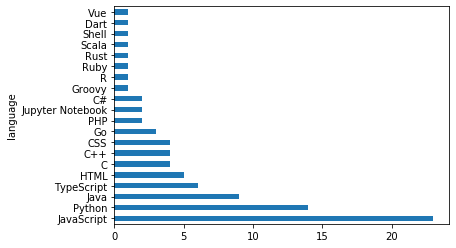

In [72]:
count.repo.plot.barh()